In [2]:
import pandas as pd

# Load data
df = pd.read_csv("C:\\Users\\hp\\Desktop\\Airbnb data.csv")

# Clean price column
df['price'] = df['price'].astype(str).str.replace('$','').str.replace(',','')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows where price is missing
df = df.dropna(subset=['price'])

print("Data shape after cleaning:", df.shape)
print("Price column sample:", df['price'].head())


Data shape after cleaning: (945, 75)
Price column sample: 2    172.0
3    201.0
4    300.0
5    219.0
8    165.0
Name: price, dtype: float64


In [3]:
# Save cleaned dataset
df.to_csv("Airbnb_cleaned.csv", index=False)

# Load cleaned dataset (whenever you start fresh)
df_clean = pd.read_csv("Airbnb_cleaned.csv")

print("Cleaned dataset shape:", df_clean.shape)
print(df_clean.head())


Cleaned dataset shape: (945, 75)
         id                          listing_url     scrape_id last_scraped  \
0   19581.0   https://www.airbnb.com/rooms/19581  2.024120e+13   12/28/2024   
1   27498.0   https://www.airbnb.com/rooms/27498  2.024120e+13   12/28/2024   
2   79762.0   https://www.airbnb.com/rooms/79762  2.024120e+13   12/28/2024   
3  106474.0  https://www.airbnb.com/rooms/106474  2.024120e+13   12/28/2024   
4  405144.0  https://www.airbnb.com/rooms/405144  2.024120e+13   12/28/2024   

        source                                 name  \
0  city scrape             Furnished suite, Windsor   
1  city scrape      Furnished suite 2 @ the Windsor   
2  city scrape    Cambridge Getaway @ Harvard & MIT   
3  city scrape  large furnished suite in Central sq   
4  city scrape      Apartment in Harvard's Backyard   

                                         description  \
0  Welcome to Area IV! We are located, convenient...   
1  Welcome to Area IV! We are located, convenient

In [4]:
df_clean.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,19581.0,https://www.airbnb.com/rooms/19581,2.024120e+13,12/28/2024,city scrape,"Furnished suite, Windsor","Welcome to Area IV! We are located, convenient...",NaN,https://a0.muscache.com/pictures/188f1b4b-f37b...,74249,...,4.90,4.90,4.30,NaN,t,3,0,3,0,0.07
1,27498.0,https://www.airbnb.com/rooms/27498,2.024120e+13,12/28/2024,city scrape,Furnished suite 2 @ the Windsor,"Welcome to Area IV! We are located, convenient...",NaN,https://a0.muscache.com/pictures/bab30c3c-ff3c...,74249,...,4.75,4.88,4.63,NaN,t,3,0,3,0,0.15
2,79762.0,https://www.airbnb.com/rooms/79762,2.024120e+13,12/28/2024,city scrape,Cambridge Getaway @ Harvard & MIT,Charming 2-bedroom apartment on the third floo...,Annmarie and I have lived in this area for ove...,https://a0.muscache.com/pictures/airflow/Hosti...,430015,...,4.93,4.93,4.76,STR-15661,f,1,1,0,0,2.61
3,106474.0,https://www.airbnb.com/rooms/106474,2.024120e+13,12/28/2024,city scrape,large furnished suite in Central sq,"Welcome to Area IV! We are located, convenient...",NaN,https://a0.muscache.com/pictures/f4794a48-e943...,74249,...,5.00,4.87,4.57,ROT-10694669-006,t,3,0,3,0,0.14
4,405144.0,https://www.airbnb.com/rooms/405144,2.024120e+13,12/28/2024,city scrape,Apartment in Harvard's Backyard,NaN,NaN,https://a0.muscache.com/pictures/4569264/44b79...,2018955,...,4.92,4.92,4.55,NaN,f,1,1,0,0,0.35


In [5]:
df_clean["price"]

0      172.0
1      201.0
2      300.0
3      219.0
4      165.0
       ...  
940     61.0
941     44.0
942     46.0
943    154.0
944     48.0
Name: price, Length: 945, dtype: float64

Price Distribution

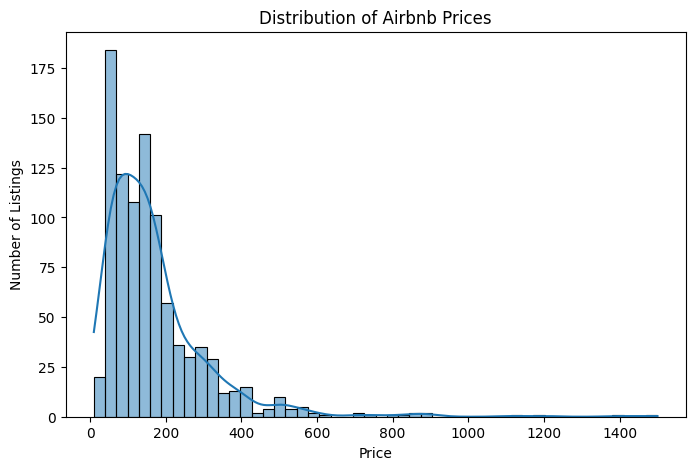

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of prices
plt.figure(figsize=(8,5))
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.show()


Average Price by Room Type

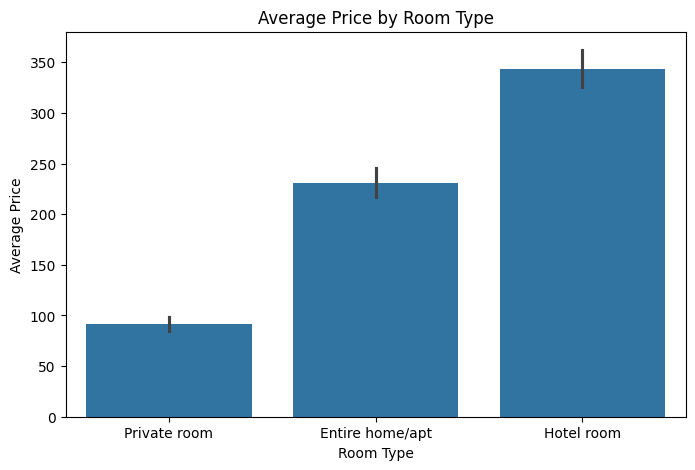

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(x="room_type", y="price", data=df_clean)
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.show()


Average Price by Property Type

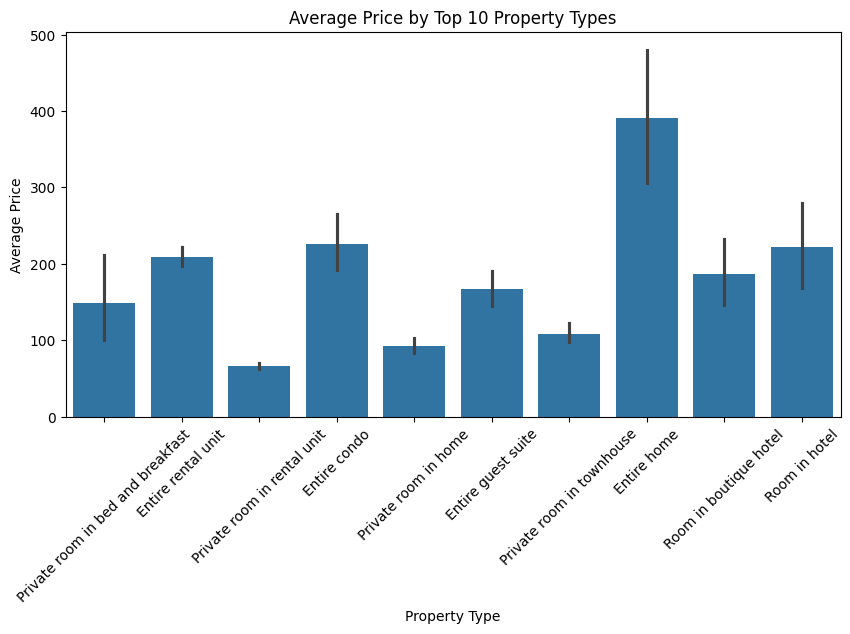

In [8]:
# Select only the top 10 property types by count
top_props = df_clean['property_type'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.barplot(x="property_type", y="price", 
            data=df_clean[df_clean['property_type'].isin(top_props)])
plt.title("Average Price by Top 10 Property Types")
plt.xlabel("Property Type")
plt.ylabel("Average Price")
plt.xticks(rotation=45)  # rotate labels for clarity
plt.show()


Average Price by Neighborhood

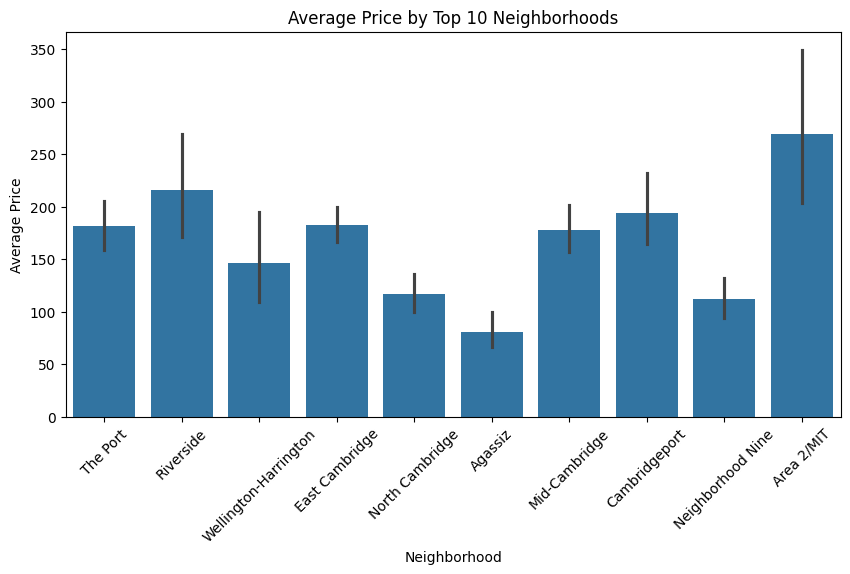

In [9]:
# Select only the top 10 neighborhoods by count
top_neigh = df_clean['neighbourhood_cleansed'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.barplot(x="neighbourhood_cleansed", y="price", 
            data=df_clean[df_clean['neighbourhood_cleansed'].isin(top_neigh)])
plt.title("Average Price by Top 10 Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


In [10]:
# Select important features
features = ['room_type', 'property_type', 'accommodates', 
            'bedrooms', 'beds', 'bathrooms', 'neighbourhood_cleansed']

X = df_clean[features]
y = df_clean['price']


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess: one-hot encode categorical columns
categorical_cols = ['room_type', 'property_type', 'neighbourhood_cleansed']
numeric_cols = ['accommodates', 'bedrooms', 'beds', 'bathrooms']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ])


In [12]:
# Build pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train model
model.fit(X_train, y_train)

# Test model
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print("R² score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessor: add imputers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # replace NaN with median
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # replace NaN with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# Build pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


C:\Python3.10\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['neighbourhood_group_cleansed' 'calendar_updated']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Python3.10\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['neighbourhood_group_cleansed' 'calendar_updated']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [14]:
# Drop fully empty columns
df = df.drop(columns=['neighbourhood_group_cleansed', 'calendar_updated'], errors='ignore')

# Split features and target
X = df.drop('price', axis=1)
y = df['price']


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)



Model Evaluation:
MAE: 53.8815042993279
MSE: 14280.686801629918
RMSE: 119.50182760790698
R² Score: 0.5670760914217249


C:\Python3.10\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['neighbourhood_group_cleansed' 'calendar_updated']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Replace LinearRegression with RandomForest
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Model Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


C:\Python3.10\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['neighbourhood_group_cleansed' 'calendar_updated']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Random Forest Model Evaluation:
MAE: 44.61402116402116
MSE: 14449.426071428567
RMSE: 120.20576554986273
R² Score: 0.5619607026994164


C:\Python3.10\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['neighbourhood_group_cleansed' 'calendar_updated']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor(random_state=42))])

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R² Score:", r2_score(y_test, y_pred_gb))



C:\Python3.10\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['neighbourhood_group_cleansed' 'calendar_updated']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Gradient Boosting Model Evaluation:
MAE: 49.619140925799634
RMSE: 117.84922866743696
R² Score: 0.5789671663314331


C:\Python3.10\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['neighbourhood_group_cleansed' 'calendar_updated']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


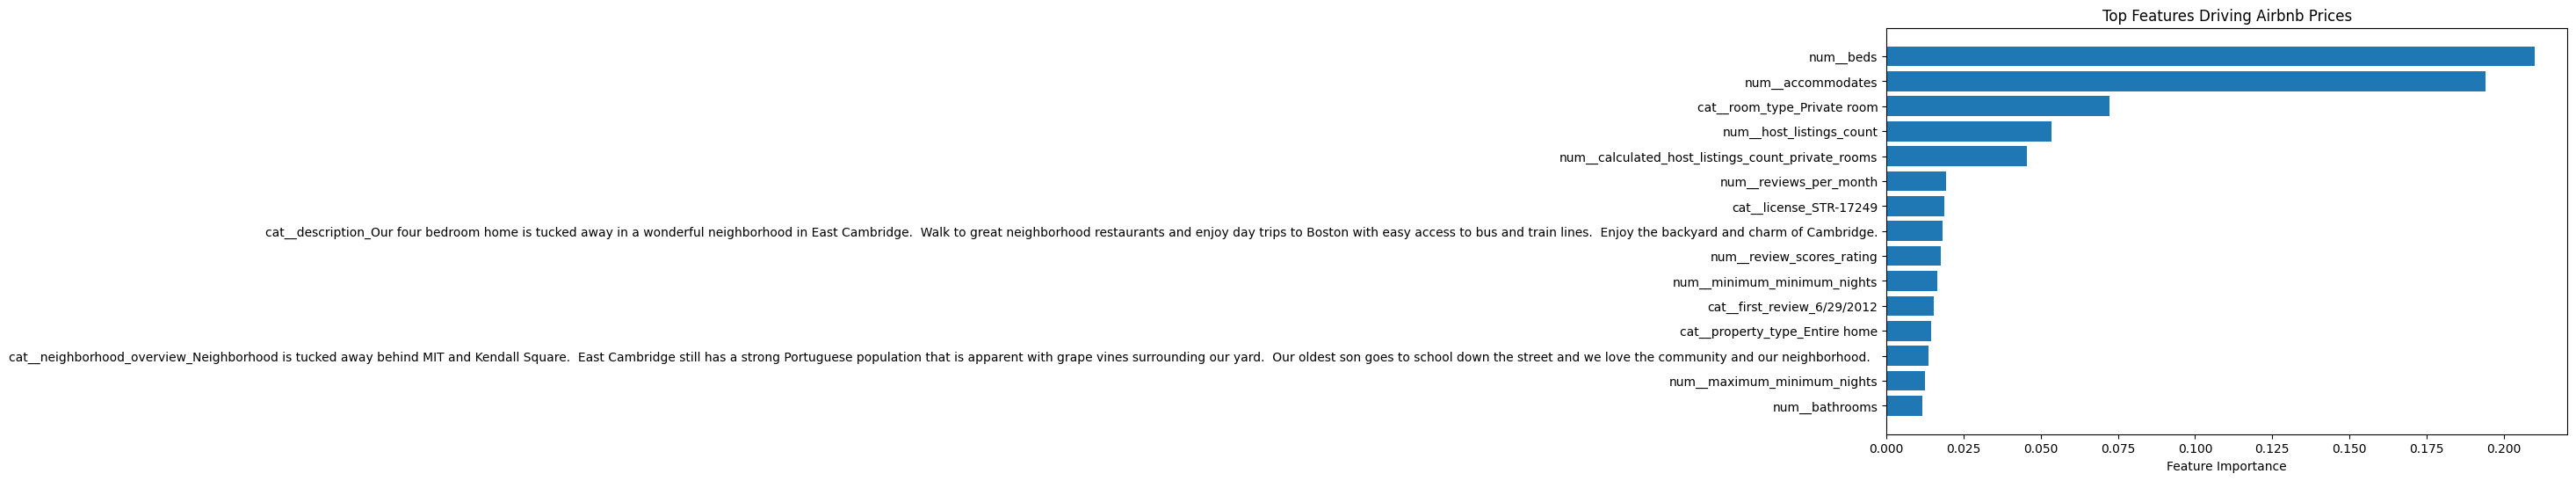

In [20]:
import matplotlib.pyplot as plt

# Get feature names after preprocessing
feature_names = gb_model.named_steps['preprocessor'].get_feature_names_out()
importances = gb_model.named_steps['regressor'].feature_importances_

# Sort and plot top 15 features
sorted_idx = importances.argsort()[-15:]

plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top Features Driving Airbnb Prices")
plt.show()


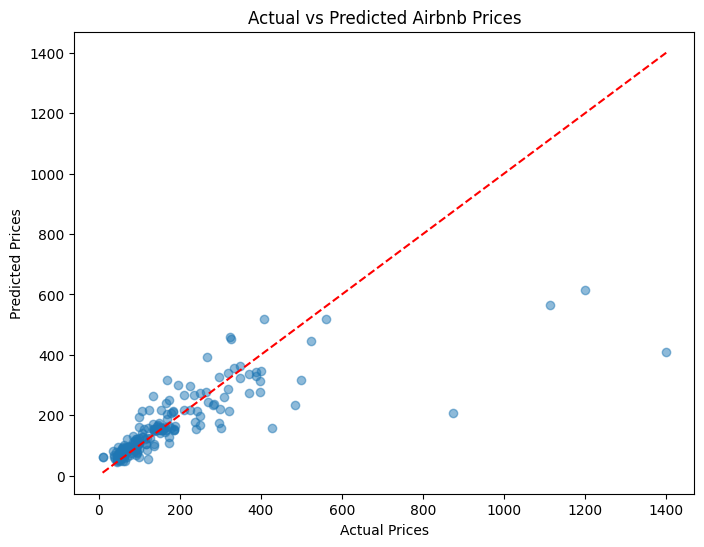

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Airbnb Prices")
plt.show()


In [22]:
import joblib

joblib.dump(gb_model, "airbnb_price_model.pkl")
print("Model saved as airbnb_price_model.pkl")


Model saved as airbnb_price_model.pkl


In this project, we analyzed Airbnb listing data to predict rental prices. After cleaning and preparing the dataset, we tested three machine learning models:

Linear Regression

Random Forest Regressor

Gradient Boosting Regressor

Our results showed:

Random Forest had the lowest average error (MAE).

Gradient Boosting achieved the best overall performance with R² ≈ 0.58 and the lowest RMSE.

Key features influencing price included room type, accommodates, bedrooms, location, and number of reviews.

 Final Model Chosen: Gradient Boosting Regressor, as it balances prediction accuracy and interpretability.

This project demonstrates how machine learning can help hosts and analysts understand pricing patterns in Airbnb markets.